In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
69            5.6          2.5           3.9          1.1
29            4.7          3.2           1.6          0.2
126           6.2          2.8           4.8          1.8
84            5.4          3.0           4.5          1.5
90            5.5          2.6           4.4          1.2
93            5.0          2.3           3.3          1.0
33            5.5          4.2           1.4          0.2
24            4.8          3.4           1.9          0.2
62            6.0          2.2           4.0          1.0
140           6.7          3.1           5.6          2.4
The accuracy score of K-Mean:  0.44666666666666666


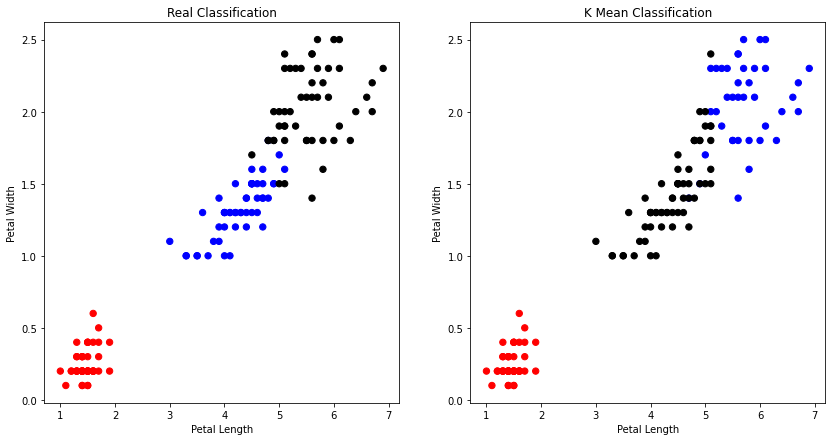

In [5]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(X.sample(10))
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'blue', 'black','magenta'])

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
142     -0.052506    -0.822570      0.762758     0.922303
120      1.280340     0.328414      1.103783     1.448832
48      -0.658345     1.479398     -1.283389    -1.315444
10      -0.537178     1.479398     -1.283389    -1.315444
121     -0.294842    -0.592373      0.649083     1.053935
71       0.310998    -0.592373      0.137547     0.132510
94      -0.294842    -0.822570      0.251221     0.132510
9       -1.143017     0.098217     -1.283389    -1.447076
18      -0.173674     1.709595     -1.169714    -1.183812
60      -1.021849    -2.433947     -0.146641    -0.262387
The accuracy score of EM:  0.0


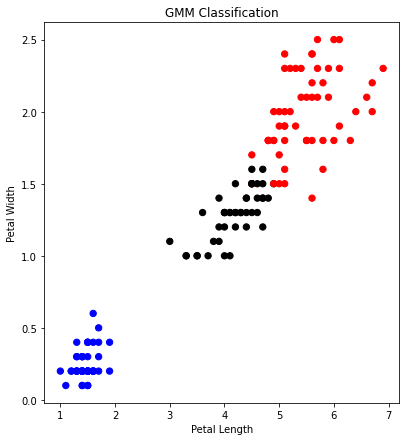

In [6]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print(xs.sample(10))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))